<a href="https://colab.research.google.com/github/vaibram/Research/blob/main/CLEANING_OF_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
from sklearn.preprocessing import LabelBinarizer # Label encoding, 1-hot encoding, multi-encoding
# LABEL binarizer is a 1-hot encoded MATRIX 
import cv2
import pandas as pd
import numpy as np
import random
import imutils
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from sklearn.model_selection import train_test_split
import os

In [2]:
covid = '/content/SAMPLE'
def loadImages(path = "/content/SAMPLE"):
    temp = os.listdir(path)
    images=[]
    for i in temp:
      if(i.endswith("jpg,png")):
        images.append(i)
    print(temp)

all_images = sorted(list(paths.list_images(covid)))
all_images[:100000]


['/content/SAMPLE/COVID 001.jpg',
 '/content/SAMPLE/COVID 002.jpg',
 '/content/SAMPLE/COVID 003.jpg',
 '/content/SAMPLE/COVID 004.jpg',
 '/content/SAMPLE/COVID 005.jpg',
 '/content/SAMPLE/COVID 006.jpg',
 '/content/SAMPLE/COVID 007.jpg',
 '/content/SAMPLE/COVID 008.jpg',
 '/content/SAMPLE/COVID 009.jpg',
 '/content/SAMPLE/COVID 010.jpg',
 '/content/SAMPLE/COVID 011.jpg',
 '/content/SAMPLE/COVID 012.jpg',
 '/content/SAMPLE/COVID 013.jpg',
 '/content/SAMPLE/COVID 014.jpg',
 '/content/SAMPLE/COVID 015.jpg',
 '/content/SAMPLE/COVID 016.jpg',
 '/content/SAMPLE/COVID 017.jpg',
 '/content/SAMPLE/COVID 018.jpg',
 '/content/SAMPLE/COVID 019.jpg',
 '/content/SAMPLE/COVID 020.jpg',
 '/content/SAMPLE/COVID 021.jpg',
 '/content/SAMPLE/COVID 022.jpg',
 '/content/SAMPLE/COVID 023.jpg',
 '/content/SAMPLE/COVID 024.jpg',
 '/content/SAMPLE/COVID 025.jpg',
 '/content/SAMPLE/COVID 026.jpg',
 '/content/SAMPLE/COVID 027.jpg',
 '/content/SAMPLE/COVID 028.jpg',
 '/content/SAMPLE/COVID 029.jpg',
 '/content/SAM

In [3]:
filenames=os.listdir("/content/SAMPLE")
categories=[]
for f_name in filenames:
    category=f_name.split(' ')[0]
    
    if category=='NORMAL':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [4]:
df


,filename,category
0,COVID 051.jpg,0
1,COVID 048.jpg,0
2,COVID 075.jpg,0
3,COVID 029.jpg,0
4,COVID 099.jpg,0
...,...,...
100,COVID 052.jpg,0
101,COVID 105.jpg,0
102,COVID 034.jpg,0
103,COVID 061.jpg,0


In [5]:
from keras import backend
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential

In [6]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [9]:
df["category"] = df["category"].replace({0:'COVID',1:'NORMAL'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [10]:
total_validate

21

In [11]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/SAMPLE",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/SAMPLE", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/TEST-1",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 84 validated image filenames belonging to 1 classes.
Found 21 validated image filenames belonging to 1 classes.
Found 41 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 43 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [13]:
test_filenames = os.listdir("/content/SAMPLE")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [14]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 6s 946ms/step - loss: 3.6374 - accuracy: 0.4416 - val_loss: 1.5476 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 4s 789ms/step - loss: 3.3181 - accuracy: 0.5061 - val_loss: 1.4937 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 4s 729ms/step - loss: 2.9679 - accuracy: 0.5810 - val_loss: 1.5825 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 4s 735ms/step - loss: 2.5746 - accuracy: 0.5187 - val_loss: 1.8263 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 4s 749ms/step - loss: 2.4929 - accuracy: 0.4294 - val_loss: 3.1818 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 4s 755ms/step - loss: 2.6930 - accuracy: 0.4647 - val_loss: 2.1195 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 4s 809ms/step - loss: 2.4431 - accuracy: 0.5289 - val_loss: 1.4427 - val_accuracy: 1.0000
Epoch 8/10
5/5 [

In [15]:
test_filenames = os.listdir("/content/TEST-1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [16]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [23]:
l=[]
print(np.argmax(predict, axis=-1))
l.extend(np.argmax(predict, axis=-1))
print(l)
len(l)
k=np.zeros(72,dtype=int)
l.extend(k)
len(l)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


113

In [24]:
test_df["category"]=l


In [25]:
test_df['category'] = l
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'NORMAL': 1, 'COVID': 0 })

In [26]:
test_df

,filename,category
0,COVID 148.jpg,0
1,COVID 180.jpg,0
2,COVID 048.jpg,0
3,COVID 029.jpg,0
4,COVID 140.jpg,0
...,...,...
108,COVID 165.jpg,0
109,COVID 046.jpg,0
110,COVID 030.jpg,0
111,COVID 190.jpg,0


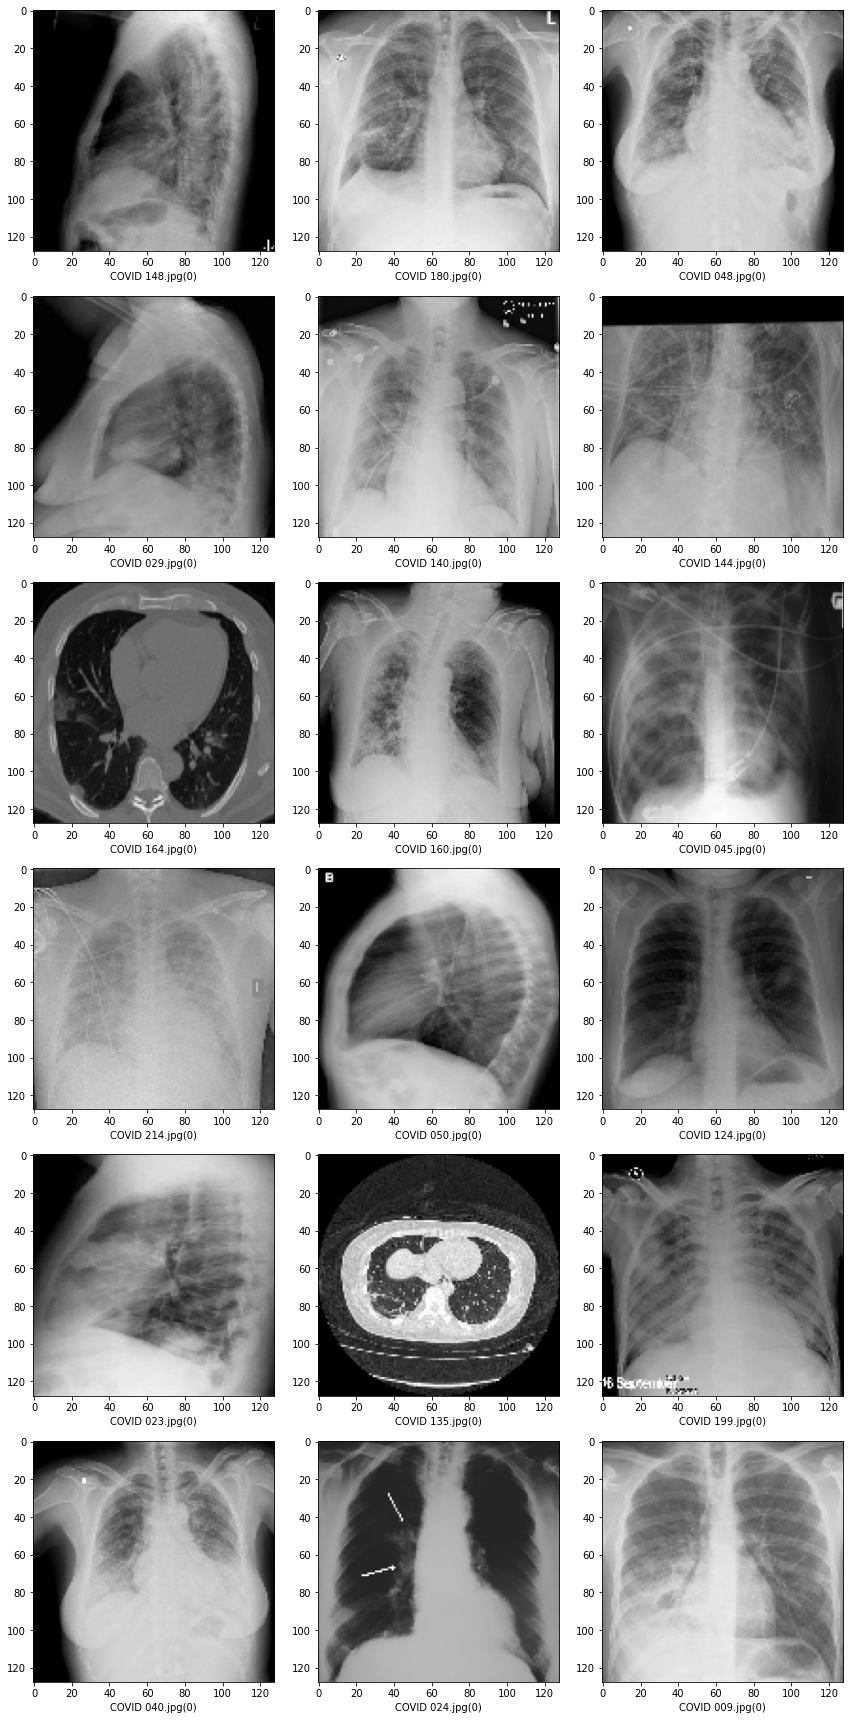

In [27]:
from keras.preprocessing.image import ImageDataGenerator,load_img
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/TEST-1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [29]:
results={
    0:'COVID',
    1:'NORMAL'
}
from PIL import Image
import numpy as np
im=Image.open("/content/1-s2.0-S0735675720302746-gr1_lrg.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

0 COVID


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
